In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [3]:
plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Arial"

In [5]:
df = pd.read_csv("results/analyzed/mean.csv")
display(df.sort_values("r").iloc[::-1])

,rho,nu,zeta,eta,gamma,c,oc,oo,nc,no,y,r,h,g
8399,2,7,0.1,1.0,0.998895,0.175855,0.001862,0.047182,0.007974,0.942982,0.834116,0.855655,0.991069,0.169361
857,1,7,0.1,1.0,0.997734,0.174637,0.001187,0.030071,0.005387,0.963355,0.841614,0.854830,0.992135,0.160694
8059,4,7,0.1,1.0,0.996333,0.178451,0.004924,0.089876,0.013836,0.891364,0.812653,0.854491,0.988876,0.187337
8385,2,5,0.1,1.0,0.996899,0.225615,0.005162,0.070391,0.016898,0.907549,0.814161,0.852905,0.989395,0.186714
563,9,10,0.1,1.0,0.990937,0.134907,0.006027,0.134539,0.012860,0.846575,0.800320,0.852482,0.987389,0.202698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,10,1,0.7,0.6,0.645354,0.665128,0.948156,0.021472,0.024859,0.005512,0.269816,0.256702,0.962879,0.302329
4861,10,1,0.9,0.2,0.578593,0.728694,0.957080,0.019535,0.017598,0.005787,0.302234,0.248642,0.966613,0.378869
4348,10,1,0.8,0.2,0.657218,0.675087,0.952781,0.020372,0.021160,0.005687,0.288794,0.245241,0.963089,0.365305
5112,10,1,0.9,0.7,0.586361,0.690689,0.957893,0.017248,0.019048,0.005812,0.304148,0.227322,0.968553,0.347564


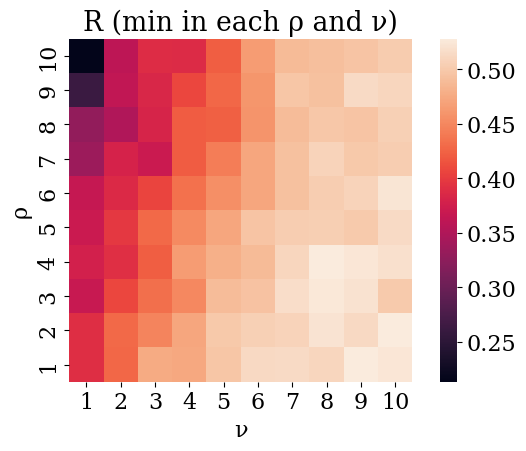

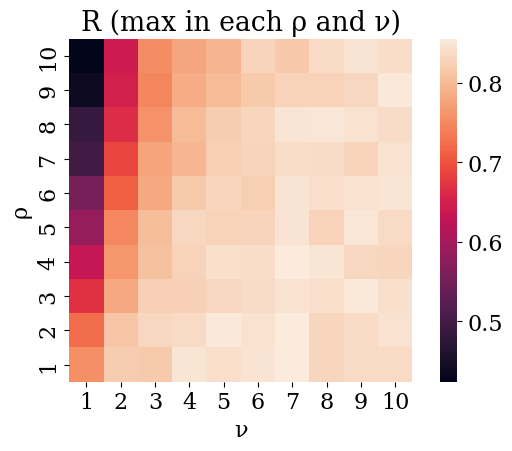

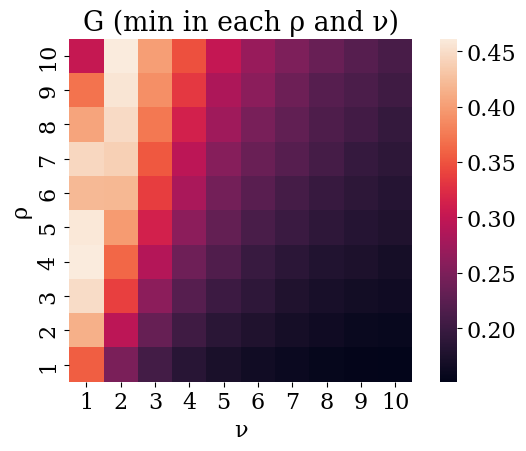

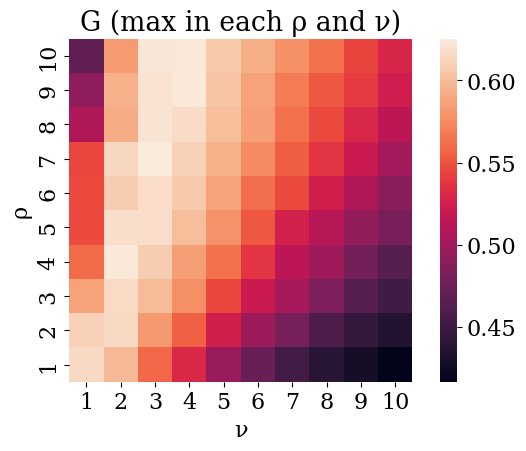

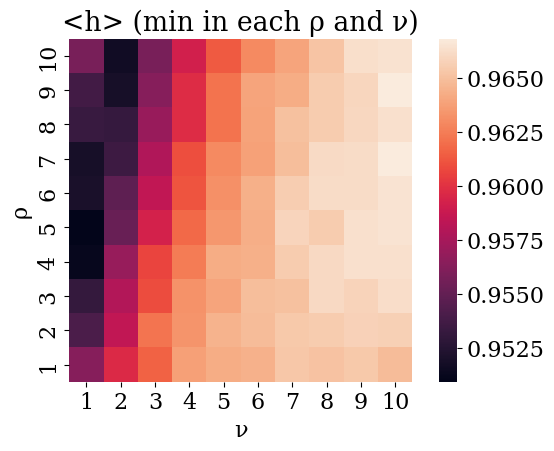

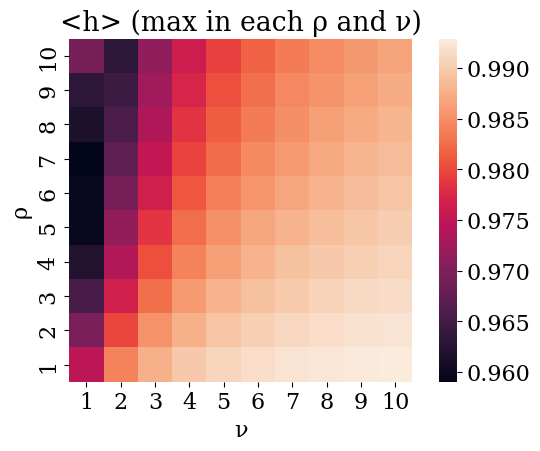

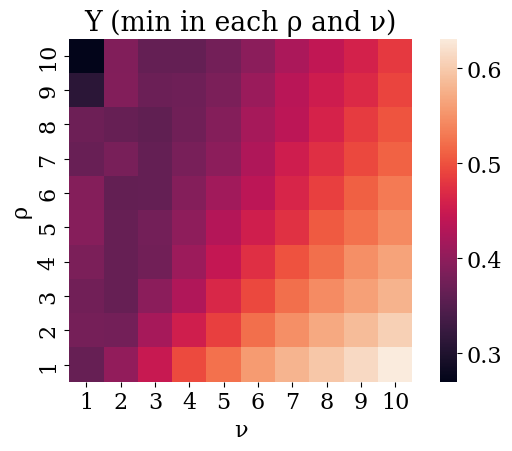

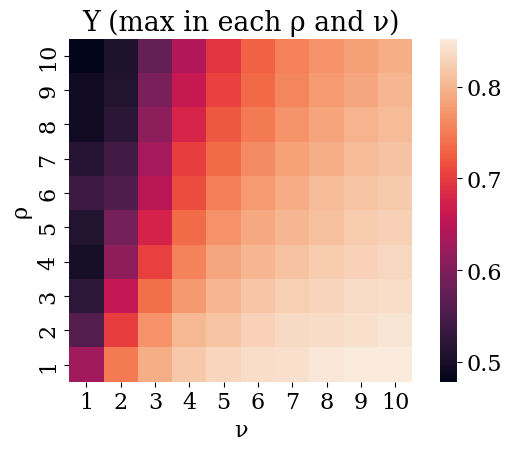

In [4]:
import os
import shutil

names = {
    "r": "R",
    "g": "G",
    "h": "<h>",
    "y": "Y",
}

out_dir = "results/imgs/novelty_ranges"

shutil.rmtree(out_dir, ignore_errors=True)
os.makedirs(out_dir, exist_ok=True)

for value in ["r", "g", "h", "y"]:
    for min_max in [min, max]:
        _data = df.pivot_table(
            index="rho",
            columns="nu",
            values=value,
            aggfunc=min_max,
        )[::-1]
        sns.heatmap(_data, square=True)
        plt.title(f"{names[value]} ({min_max.__name__} in each ρ and ν)")
        plt.xlabel("ν")
        plt.ylabel("ρ")
        plt.tight_layout()
        plt.savefig(f"{out_dir}/{value}_{min_max.__name__}.png", dpi=100)
        plt.savefig(f"{out_dir}/{value}_{min_max.__name__}.pdf")
        plt.show()
        plt.close()


In [6]:
metrics_dict = {
    "r": "R",
    "g": "G",
    "h": "<h>",
    "y": "Y",
}

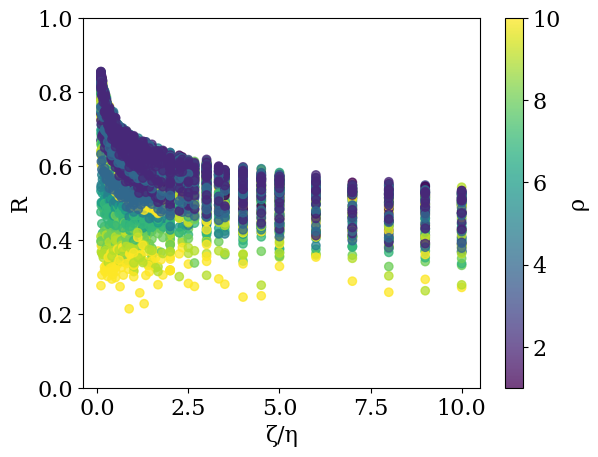

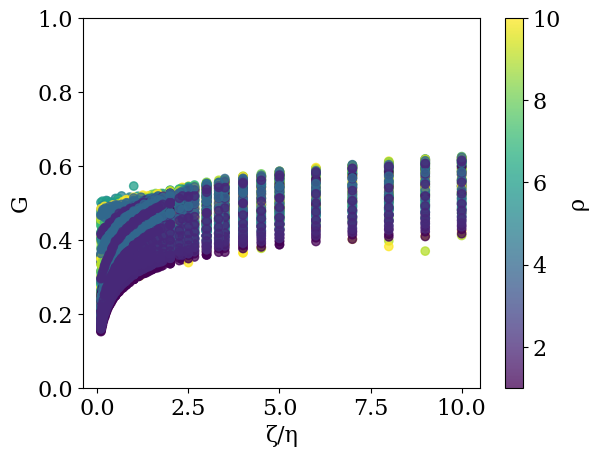

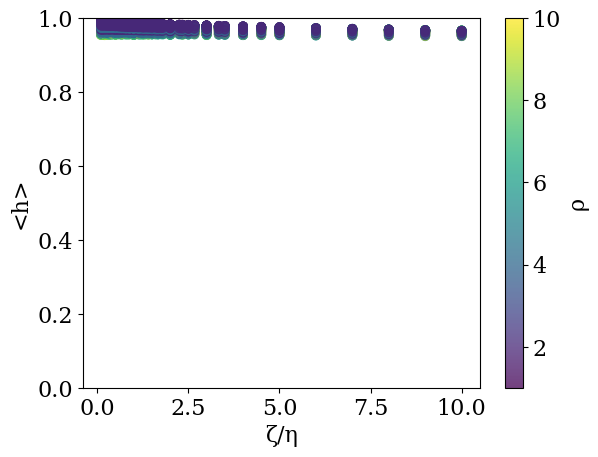

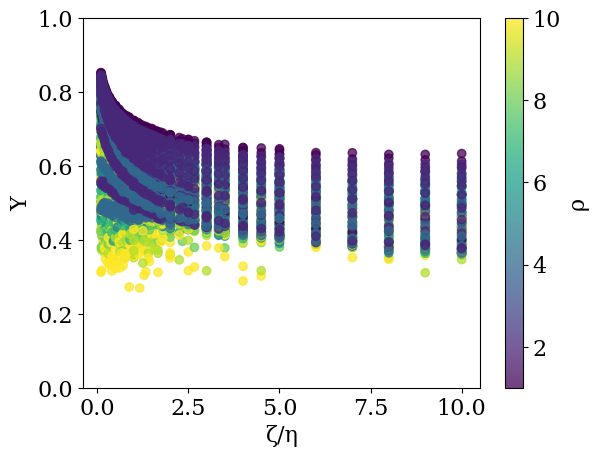

In [5]:
for metrics, label in metrics_dict.items():

    _data = df.copy()
    _data["ratio"] = _data["zeta"] / _data["eta"]

    cm: matplotlib.colors.ListedColormap = plt.cm.get_cmap() # type: ignore
    fig = plt.figure()
    ax = fig.add_subplot()

    mappable = ax.scatter(x=_data["ratio"], y=_data[metrics], c=_data["rho"], cmap=cm, alpha=0.75)
    cb = fig.colorbar(mappable, ax=ax)
    cb.set_label("ρ")

    plt.ylim(0, 1)
    plt.xlabel("ζ/η")
    plt.ylabel(label)
    plt.show()


In [7]:
aps = pd.read_csv("results/analyzed_targets/aps.csv").iloc[0]
twitter = pd.read_csv("results/analyzed_targets/twitter.csv").iloc[0]

display(aps)
display(twitter)

rho      0.000000
nu       0.000000
zeta     0.000000
eta      0.000000
gamma    0.998455
c        0.038424
oc       0.009249
oo       0.140857
nc       0.019998
no       0.829896
y        0.747155
r        0.629015
h        0.989714
g        0.218959
Name: 0, dtype: float64

rho      0.000000
nu       0.000000
zeta     0.000000
eta      0.000000
gamma    0.914799
c        0.061654
oc       0.084114
oo       0.298838
nc       0.044244
no       0.572803
y        0.530514
r        0.475842
h        0.961771
g        0.225112
Name: 0, dtype: float64

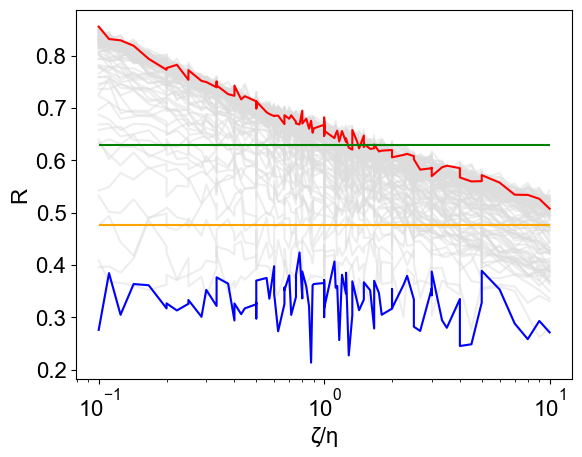

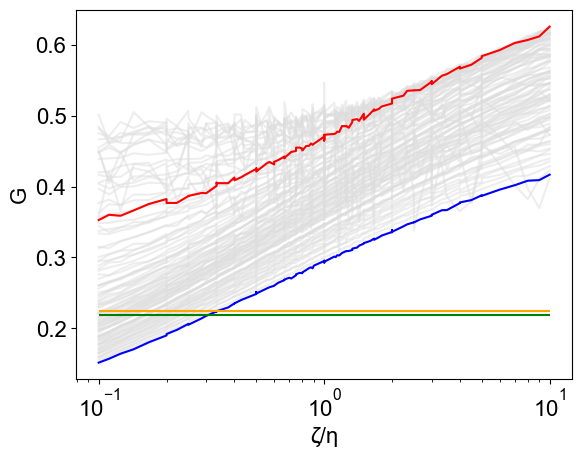

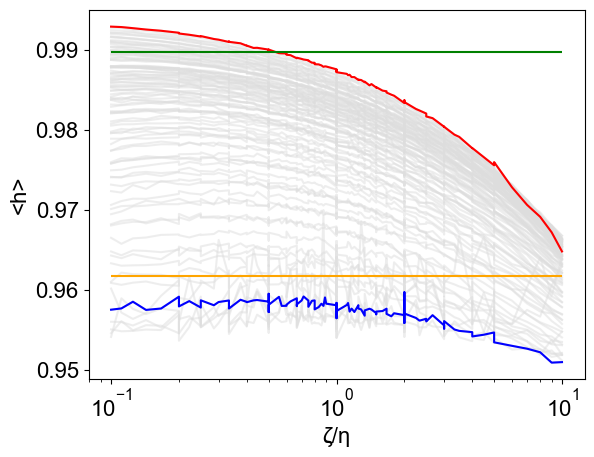

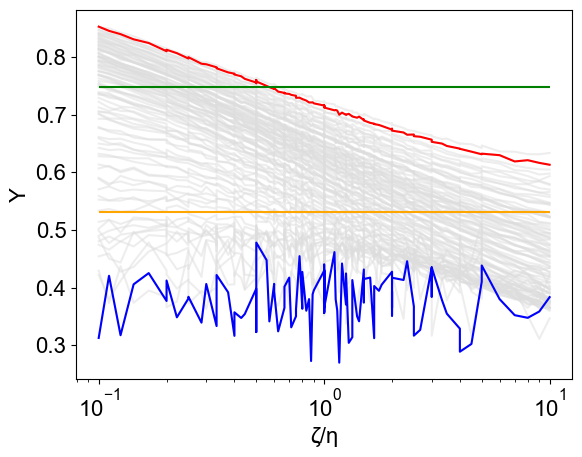

In [8]:
_data = df.copy()
_data["ratio"] = _data["zeta"] / _data["eta"]
_data = _data.sort_values("ratio")

metrics, metrics_label = list(metrics_dict.items())[0]

for metrics, metrics_label in metrics_dict.items():

    gd = _data.groupby(by=["rho", "nu"])
    for _, _df in gd:
        plt.plot(_df.ratio, _df[metrics], color="#DDDDDD", alpha=0.5)


    # 最小値を取る線をプロット
    min_row = _data.iloc[_data[metrics].argmin()]
    min_data = _data.loc[(_data.rho == min_row.rho) & (_data.nu == min_row.nu)]
    plt.plot(min_data.ratio, min_data[metrics], color="blue")

    # 最大値を取る線をプロット
    max_row = _data.iloc[_data[metrics].argmax()]
    max_data = _data.loc[(_data.rho == max_row.rho) & (_data.nu == max_row.nu)]
    plt.plot(max_data.ratio, max_data[metrics], color="red")

    # Twitter のデータをプロット
    plt.hlines(y=[twitter[metrics]], xmin=0.1, xmax=10, colors=["orange"])

    # APS のデータをプロット
    plt.hlines(y=[aps[metrics]], xmin=0.1, xmax=10, colors=["green"])

    plt.xlabel("ζ/η")
    plt.ylabel(metrics_label)
    plt.xscale("log")

    plt.show()

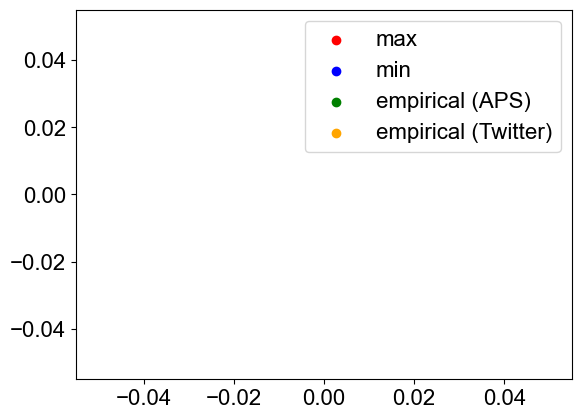

In [9]:
# 凡例を生成するだけのもの
fig, ax = plt.subplots()
ax.scatter([], [], c="red", label="max")
ax.scatter([], [], c="blue", label="min")
ax.scatter([], [], c="green", label="empirical (APS)")
ax.scatter([], [], c="orange", label="empirical (Twitter)")
ax.legend()
plt.show()